<a href="https://colab.research.google.com/github/JaehwanKim00/Bigdata_python/blob/main/Part02/ch02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 전처리

In [1]:
import numpy as np
import pandas as pd

# np.random.randn(n) : 0~1개 사이의 균일한 분포를 갖는 난수 n개를 생성
# np.random.randint(min,max,size=n) : min~max 사이의 균일한 분포를 갖는 임의의 정수 n개를 생성
# np.random.randn(n) : 평균 0, 표준편차 1의 표준정규분포를 갖는 난수 n개를 생성
#                      평균 뮤와 표준편차 시그마의 정규분포를 갖는 난수를 생성하기 위해서는
#                      시그마 * random.randn(n) + 뮤의 식 사용


meat_consumption_korean = 5*np.random.randn(1000) + 53.9
meat_consumption_japan = 4*np.random.randn(1000) + 32.7

meat_consumption = pd.DataFrame({'한국인':meat_consumption_korean,'일본인':meat_consumption_japan})

meat_consumption.head(10)

,한국인,일본인
0,52.889604,32.908473
1,49.977632,35.416252
2,50.870395,30.122952
3,51.294470,27.518716
4,49.205689,31.605485
5,56.202246,34.365703
6,53.408038,38.934342
7,58.094420,33.351369
8,52.218404,30.363532
9,47.478559,41.938519


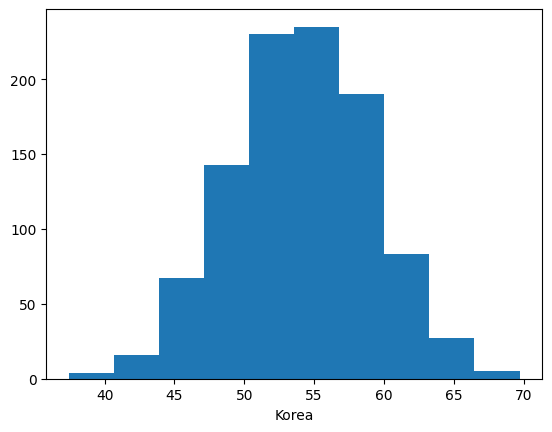

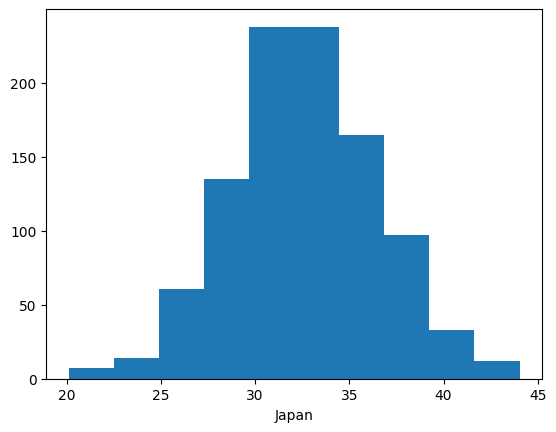

In [2]:
import matplotlib.pyplot as plt


plt.hist(meat_consumption_korean)
plt.xlabel('Korea')
plt.show()


plt.hist(meat_consumption_japan)
plt.xlabel('Japan')
plt.show()

In [3]:
# Z - 표준화

import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/df_sample.csv')


mid_avg = np.mean(df['중간'])
mid_std = np.std(df['중간'])
df['중간_Z점수'] = (df['중간']-mid_avg)/mid_std

df.head()

,학번,중간,기말,리포트,퀴즈,중간_Z점수
0,S01,90,95,20,20,1.231167
1,S02,82,83,18,18,0.436866
2,S03,80,78,18,18,0.238290
3,S04,78,75,10,10,0.039715
4,S05,93,91,12,12,1.529030


In [4]:
import scipy.stats as ss
meat_consumption['한국인_정규화'] = ss.zscore(meat_consumption_korean)
meat_consumption['일본인_정규화'] = ss.zscore(meat_consumption_japan)

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화
0,52.889604,32.908473,-0.232356,0.077993
1,49.977632,35.416252,-0.815822,0.724507
2,50.870395,30.122952,-0.636941,-0.640124
3,51.294470,27.518716,-0.551970,-1.311506
4,49.205689,31.605485,-0.970494,-0.257922


In [5]:
# 다른 방식

meat_consumption['한국인_정규화2'] = (meat_consumption_korean - np.mean(meat_consumption_korean))/np.std(meat_consumption_korean)
meat_consumption['일본인_정규화2'] = (meat_consumption_japan - np.mean(meat_consumption_japan))/np.std(meat_consumption_japan)

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화2,일본인_정규화2
0,52.889604,32.908473,-0.232356,0.077993,-0.232356,0.077993
1,49.977632,35.416252,-0.815822,0.724507,-0.815822,0.724507
2,50.870395,30.122952,-0.636941,-0.640124,-0.636941,-0.640124
3,51.294470,27.518716,-0.551970,-1.311506,-0.551970,-1.311506
4,49.205689,31.605485,-0.970494,-0.257922,-0.970494,-0.257922


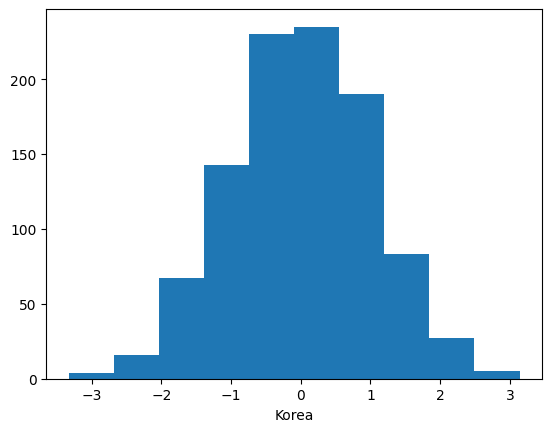

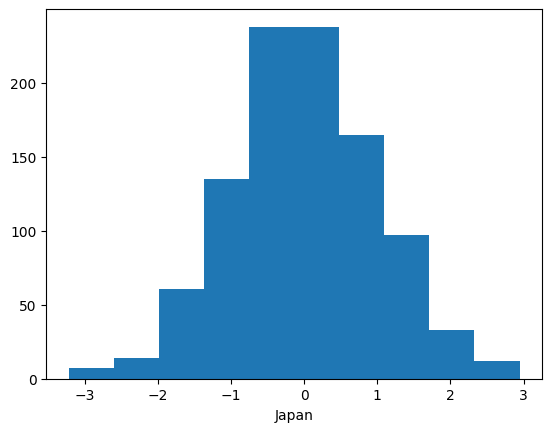

In [6]:
# 표준화된 히스토그램

plt.hist(meat_consumption['한국인_정규화'])
plt.xlabel('Korea')
plt.show()

plt.hist(meat_consumption['일본인_정규화'])
plt.xlabel('Japan')
plt.show()

In [7]:
# 사이킷런 이용한 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
meat_consumption['한국인_정규화3'] = scaler.fit_transform(meat_consumption[['한국인']])

scaler = StandardScaler()
meat_consumption['일본인_정규화3'] = scaler.fit_transform(meat_consumption[['일본인']])

meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화2,일본인_정규화2,한국인_정규화3,일본인_정규화3
0,52.889604,32.908473,-0.232356,0.077993,-0.232356,0.077993,-0.232356,0.077993
1,49.977632,35.416252,-0.815822,0.724507,-0.815822,0.724507,-0.815822,0.724507
2,50.870395,30.122952,-0.636941,-0.640124,-0.636941,-0.640124,-0.636941,-0.640124
3,51.294470,27.518716,-0.551970,-1.311506,-0.551970,-1.311506,-0.551970,-1.311506
4,49.205689,31.605485,-0.970494,-0.257922,-0.970494,-0.257922,-0.970494,-0.257922


In [8]:
# Min-Max 정규화
# 연속형 변수의 값을 0~1 사이의 값으로 변환

fin_min = np.min(df['기말'])
fin_max = np.max(df['기말'])
df['기말_정규화'] = (df['기말']-fin_min)/(fin_max-fin_min)

df.head()

,학번,중간,기말,리포트,퀴즈,중간_Z점수,기말_정규화
0,S01,90,95,20,20,1.231167,1.000000
1,S02,82,83,18,18,0.436866,0.600000
2,S03,80,78,18,18,0.238290,0.433333
3,S04,78,75,10,10,0.039715,0.333333
4,S05,93,91,12,12,1.529030,0.866667


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
meat_consumption['한국인_mm'] = scaler.fit_transform(meat_consumption[['한국인']])

scaler = MinMaxScaler()
meat_consumption['일본인_mm'] = scaler.fit_transform(meat_consumption[['일본인']])

meat_consumption[['한국인','일본인','한국인_mm','일본인_mm']].head()

,한국인,일본인,한국인_mm,일본인_mm
0,52.889604,32.908473,0.478959,0.535006
1,49.977632,35.416252,0.388787,0.639832
2,50.870395,30.122952,0.416432,0.418571
3,51.294470,27.518716,0.429564,0.309713
4,49.205689,31.605485,0.364883,0.480541


In [10]:
# Min-Max 수식이용
Min = np.min(meat_consumption_korean)
Max = np.max(meat_consumption_korean)
meat_consumption['한국인_mm2'] = (meat_consumption[['한국인']]-Min)/(Max-Min)

Min = np.min(meat_consumption_japan)
Max = np.max(meat_consumption_japan)
meat_consumption['일본인_mm2'] = (meat_consumption[['일본인']]-Min)/(Max-Min)

meat_consumption[['한국인_mm','일본인_mm','한국인_mm2','일본인_mm2']].head()

,한국인_mm,일본인_mm,한국인_mm2,일본인_mm2
0,0.478959,0.535006,0.478959,0.535006
1,0.388787,0.639832,0.388787,0.639832
2,0.416432,0.418571,0.416432,0.418571
3,0.429564,0.309713,0.429564,0.309713
4,0.364883,0.480541,0.364883,0.480541


In [11]:
# 정규분포변환
# 왜도계산
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/USJudgeRatings.csv')
df.head(5)

,Unnamed: 0,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
0,"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
1,"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
2,"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
3,"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
4,"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8


In [12]:
import scipy.stats as ss

print(ss.skew(df['CONT']))
print(ss.skew(df['PHYS']))

1.0859724796276253
-1.5582154642293153


In [13]:
# 로그변환
# 양의 왜도는 log(x), 음의 왜도는 log(max(x+1)-x)
df['CONT1'] = np.log(df['CONT'])
df['PHYS1'] = np.log(np.max(df['PHYS']+1)-df['PHYS'])

print(ss.skew(df['CONT1']))
print(ss.skew(df['PHYS1']))

0.6555571886692603
0.5824357748750443


In [14]:
# 로그10변환(X)
# 양의 왜도는 log10(x), 음의 왜도는 log10(max(x+1)-x)

df['CONT2'] = np.log10(df['CONT'])
df['PHYS2'] = np.log10(np.max(df['PHYS']+1)-df['PHYS'])

# 왜도계산
print(ss.skew(df['CONT2']))
print(ss.skew(df['PHYS2']))

0.6555571886692441
0.5824357748750438


73.5


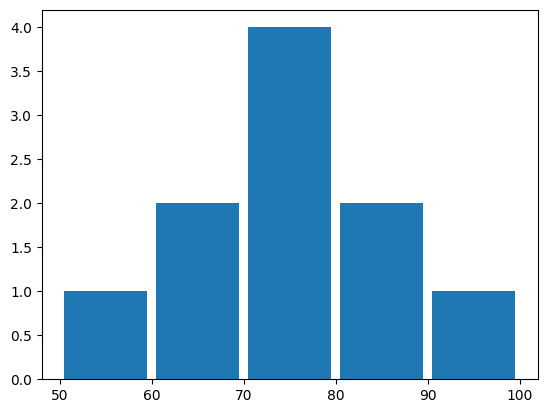

,이름,수학점수
0,철수,52
1,영희,92
2,미영,84
3,시완,71
4,미경,65
5,영환,81
6,숙경,66
7,부영,77
8,민섭,73
9,보연,74


In [15]:
# 범주화 이산형화
# cut(),qcut()
52
data = [['철수',52],['영희',92],['미영',84],['시완',71],['미경',65],
        ['영환',81],['숙경',66],['부영',77],['민섭',73],['보연',74]]
df = pd.DataFrame(data,columns = ['이름','수학점수'])

print(np.mean(df['수학점수']))

plt.hist(df['수학점수'],bins=5,range=[50,100],rwidth = 0.9)
plt.show()
df

In [16]:
# 위 데이터 가직 등급 분류
df['등급'] = 0 # 0으로 초기화
df

,이름,수학점수,등급
0,철수,52,0
1,영희,92,0
2,미영,84,0
3,시완,71,0
4,미경,65,0
5,영환,81,0
6,숙경,66,0
7,부영,77,0
8,민섭,73,0
9,보연,74,0


In [17]:
# 조건 사용해서 구간 지정
df.loc[(df['수학점수']<60),'등급'] = 'F'
df.loc[(df['수학점수']>=60) & (df['수학점수']<70),'등급'] = 'D'
df.loc[(df['수학점수']>=70) & (df['수학점수']<80),'등급'] = 'C'
df.loc[(df['수학점수']>=80) & (df['수학점수']<90),'등급'] = 'B'
df.loc[(df['수학점수']>=90) & (df['수학점수']<=100),'등급'] = 'A'

df

<ipython-input-17-c405d5c035b4>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'F' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['수학점수']<60),'등급'] = 'F'


,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


In [18]:
# cut 함수 활용
# 범위 지정해서 등급 부여
df['등급'] = pd.cut(x=df['수학점수'],
                    bins = [0,60,70,80,90,100],
                    labels = ['F','D','C','B','A'],
                    include_lowest =  True)
df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


In [19]:
# qcut 함수 활용
# 동일한 개수의 등급 부여
df['등급_qcut'] = pd.qcut(x=df['수학점수'],q=5,labels = ['F','D','C','B','A'])
df

,이름,수학점수,등급,등급_qcut
0,철수,52,F,F
1,영희,92,A,A
2,미영,84,B,A
3,시완,71,C,D
4,미경,65,D,F
5,영환,81,B,B
6,숙경,66,D,D
7,부영,77,C,B
8,민섭,73,C,C
9,보연,74,C,C


In [20]:
# PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
# PCA는 연속형 변수만 사용
df = iris.drop(['species'],axis=1)
df_species = iris['species']
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
df.shape

(150, 4)

In [24]:
# PCA 진행 전 표준화나 정규화 수행
# 변수 정규화
from sklearn.preprocessing import StandardScaler
df['sepal_length'] = StandardScaler().fit_transform(df[['sepal_length']])
df['sepal_width'] = StandardScaler().fit_transform(df[['sepal_width']])
df['petal_width'] = StandardScaler().fit_transform(df[['petal_width']])
df['pethal_length'] = StandardScaler().fit_transform(df[['petal_length']])

# PCA 수행
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
p_score = pca.fit_transform(df)
print(p_score.shape) # 원본 데이터셋이 (150,4)
print(pca.explained_variance_ratio_) # 차원의 기여도 2개의 요소만으로도 96% 정도 설명 가능

(150, 4)
[0.84405277 0.12891548 0.02140628 0.00562547]


In [25]:
df

,sepal_length,sepal_width,petal_length,petal_width,pethal_length
0,-0.900681,1.019004,1.4,-1.315444,-1.340227
1,-1.143017,-0.131979,1.4,-1.315444,-1.340227
2,-1.385353,0.328414,1.3,-1.315444,-1.397064
3,-1.506521,0.098217,1.5,-1.315444,-1.283389
4,-1.021849,1.249201,1.4,-1.315444,-1.340227
...,...,...,...,...,...
145,1.038005,-0.131979,5.2,1.448832,0.819596
146,0.553333,-1.282963,5.0,0.922303,0.705921
147,0.795669,-0.131979,5.2,1.053935,0.819596
148,0.432165,0.788808,5.4,1.448832,0.933271


In [26]:
# 결측치 처리

df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/df_sample.csv')
x = [14,15,13,14,None,None,19,11,21,18]

df['토론'] = x

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학번      10 non-null     object 
 1   중간      10 non-null     int64  
 2   기말      10 non-null     int64  
 3   리포트     10 non-null     int64  
 4   퀴즈      10 non-null     int64  
 5   토론      8 non-null      float64
dtypes: float64(1), int64(4), object(1)
memory usage: 608.0+ bytes


In [27]:
df.head()

,학번,중간,기말,리포트,퀴즈,토론
0,S01,90,95,20,20,14.0
1,S02,82,83,18,18,15.0
2,S03,80,78,18,18,13.0
3,S04,78,75,10,10,14.0
4,S05,93,91,12,12,NaN


In [28]:
df.isnull()

,학번,중간,기말,리포트,퀴즈,토론
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,True
5,False,False,False,False,False,True
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/titanic.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [33]:
# 결측치 대체

# 제거
df_1 = df.dropna(axis = 0) # 결측치가 있는 모든 행 제거
# dropna(axis=1) # 결측치가 있는 모든 열 삭제
# df.dropna[subset=['Age],axis=0] -> Age열의 결측치가 있는 모든 열 삭제
print(df_1.isnull().sum().sum())
print(df_1.isnull().sum())
print(df_1.shape)
df_1.info()

0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
(183, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [34]:
df_2 = df.dropna(axis=1)
print(df_2.isnull().sum().sum())
print(df_2.isnull().sum())
print(df_2.shape)
df_2.info()

0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64
(891, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB


In [35]:
# 결측치를 저장값으로 대체
# Age 변수 내 결측값을 Age 변수의 평균값으로 대체

print(df['Age'].isnull().sum())
age_mean = df['Age'].mean()
age_mean
df['Age'].fillna(age_mean,inplace=True)
print(df['Age'].isnull().sum())

177
0


<ipython-input-35-7d925c5da73e>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(age_mean,inplace=True)


In [36]:
# Embarked 변수 내 결측값을 최빈값으로 대체
from scipy.stats import mode

print(df['Embarked'].isnull().sum())
embarked_mode = df['Embarked'].mode()


df['Embarked'].fillna(embarked_mode[0],inplace=True)
print(df['Embarked'].isnull().sum())

2
0


<ipython-input-36-9274dc0ecb46>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(embarked_mode[0],inplace=True)


In [37]:
# 결측치를 인접한 값으로 대체

df['Embarked'].fillna(method = 'ffill',inplace=True)
# ffill -> 직전행의 값으로 대체
# bfill -> 다음행의 값으로 대체

<ipython-input-37-70bb92736196>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Embarked'].fillna(method = 'ffill',inplace=True)


In [38]:
# 결측치를 그룹별 평균값으로 대체
df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/titanic.csv')
df.info()
print(df.groupby('Sex')['Age'].mean())
print(df.groupby('Pclass')['Age'].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [39]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [40]:
# transform-> 함수 적용
df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'),inplace=True)

df.tail()

<ipython-input-40-da69c5f49a85>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'),inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00000,0,0,370376,7.75,NaN,Q


In [41]:
# 이상치 처리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 정규분포 평균 50,표준편차 10을 가지는 데이터 200개 생성
data = 10 * np.random.randn(200) + 50
df = pd.DataFrame({'값':data})
df

,값
0,57.641024
1,42.373325
2,54.906375
3,54.296335
4,41.082165
...,...
195,53.178423
196,44.259738
197,48.746955
198,65.016545


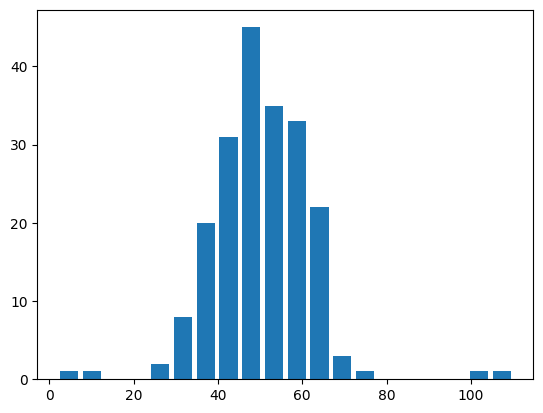

In [42]:
# 임의의 이상치 삽입
df.loc[201] = 2
df.loc[202] = 100
df.loc[203] = 10
df.loc[204] = 110

# 분포 시각화
plt.hist(df['값'],bins=20,rwidth=0.8)
plt.show()

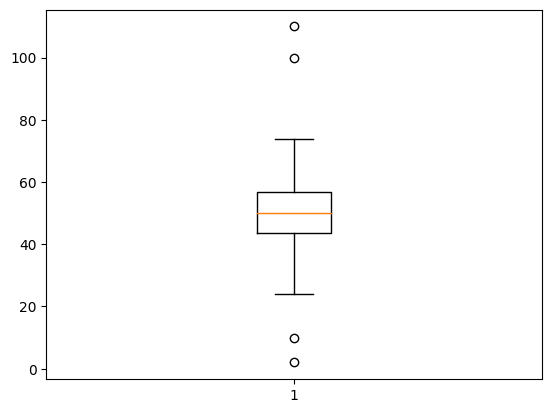

In [43]:
# IQR 방법
# 박스플롯
plt.boxplot(df['값'])
plt.show()

In [44]:
Q1 = df['값'].quantile(.25)
Q2 = df['값'].quantile(.50)
Q3 = df['값'].quantile(.75)
IQR = Q3 - Q1

print('Q1 = ', Q1)
print('Q2 = ', Q2)
print('Q3 = ', Q3)
print('IQR = ', IQR)

Q1 =  43.471759733874535
Q2 =  50.157883394514
Q3 =  56.772164913950874
IQR =  13.30040518007634


In [45]:
Q1 = df['값'].describe()['25%']
Q2 = df['값'].describe()['50%']
Q3 = df['값'].describe()['75%']
IQR = Q3-Q1

print('Q1 = ', Q1)
print('Q2 = ', Q2)
print('Q3 = ', Q3)
print('IQR = ', IQR)

Q1 =  43.471759733874535
Q2 =  50.157883394514
Q3 =  56.772164913950874
IQR =  13.30040518007634


In [48]:
condition = df['값']>(Q3+IQR*1.5)
upperOutlier = df[condition]
condition = df['값']<(Q1-IQR*1.5)
lowerOutlier = df[condition]

print(upperOutlier)
print(lowerOutlier)

         값
202  100.0
204  110.0
        값
201   2.0
203  10.0


In [49]:
Q3+IQR*1.5

76.72277268406538

In [50]:
Q1-IQR*1.5

23.521151963760026

In [51]:
# 평활화
# 데이터의 분포를 매끄럽게 함
# 잡음제거

df = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/dataset/main/lynx.csv')

print(df.head())
print(df.describe)

   Unnamed: 0  time  value
0           1  1821    269
1           2  1822    321
2           3  1823    585
3           4  1824    871
4           5  1825   1475
<bound method NDFrame.describe of      Unnamed: 0  time  value
0             1  1821    269
1             2  1822    321
2             3  1823    585
3             4  1824    871
4             5  1825   1475
..          ...   ...    ...
109         110  1930    662
110         111  1931   1000
111         112  1932   1590
112         113  1933   2657
113         114  1934   3396

[114 rows x 3 columns]>


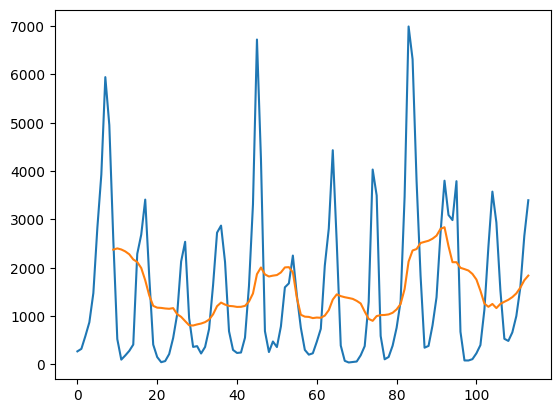

In [53]:
# 단순이동평균(Simple Moving Average)
df['sma'] = df['value'].rolling(10).mean()

plt.plot(df['value'])
plt.plot(df['sma'])
plt.show()

In [54]:
df['sma']

,sma
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
109,1391.4
110,1468.5
111,1587.6
112,1740.1


In [55]:
df['value']

,value
0,269
1,321
2,585
3,871
4,1475
...,...
109,662
110,1000
111,1590
112,2657


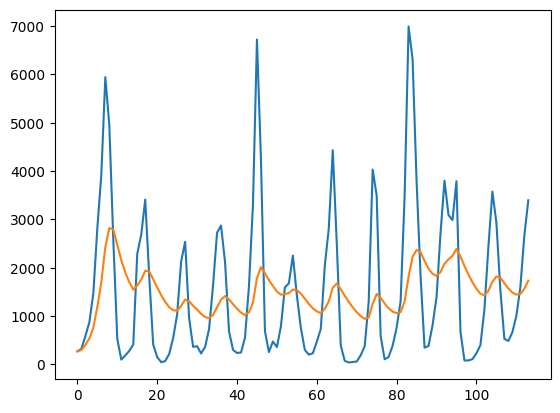

In [56]:
# 10년 지수가중이동평균
df['ewm'] = df['value'].ewm(10).mean()

plt.plot(df['value'])
plt.plot(df['ewm'])
plt.show()